# Automating Crypto Website API Pull

### Copy and pasting code from API and running it in order to be able to use API key

In [54]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '846ab453-f4e2-4d5f-823a-7f152027c87b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

### Importing pandas to use to nomalize data

In [29]:
import pandas as pd

pd.set_option('display.max.rows', None)

In [55]:
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19542118.00000,19542118.00000,False,NaN,1,NaN,NaN,None,2023-11-14T14:32:00.000Z,36562.33387,19886476615.01379,36.27190,-0.18307,-0.80438,5.13051,35.87266,38.77508,25.64255,714505442809.87341,51.02010,767809011234.46997,None,2023-11-14T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7779,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120257710.74970,120257710.74970,True,NaN,2,NaN,NaN,None,2023-11-14T14:32:00.000Z,2046.71428,13467566714.05680,33.12830,-0.13641,-1.16403,9.13210,31.55929,26.43374,12.27413,246133174039.54776,17.56480,246133174039.54999,None,2023-11-14T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,65686,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,87077275102.70656,90623656719.71295,True,NaN,3,NaN,NaN,None,2023-11-14T14:30:00.000Z,1.00038,46410958646.71170,23.29040,0.00783,0.00779,-0.01399,0.02822,0.02970,0.15094,87110706717.42296,6.22040,90658449898.21001,None,2023-11-14T14:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1759,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151701394.36130,151701394.36130,False,NaN,4,NaN,NaN,None,2023-11-14T14:30:00.000Z,245.68482,925653084.79613,19.60730,0.63223,-0.26164,-0.58188,17.55955,15.96844,5.35815,37270729922.38690,2.65790,37270729922.39000,None,2023-11-14T14:30:00.000Z,NaN,NaN,NaN,NaN,NaN
4,52,XRP,XRP,xrp,1141,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,None,2023-11-14T14:32:00.000Z,0.66214,3548594961.59591,245.04300,0.88051,1.49875,-2.74447,36.03133,34.48702,11.37844,35525833453.97668,2.53520,66214355703.85000,None,2023-11-14T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,14925,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,23997451492.01001,23997451492.01001,False,NaN,7,NaN,NaN,None,2023-11-14T14:31:00.000Z,1.00001,5732123230.15776,31.94890,0.00139,-0.00449,-0.00764,-0.00851,0.00075,-0.00298,23997794423.31768,1.71260,23997794423.32000,None,2023-11-14T14:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,422396770.12951,562465267.60190,True,NaN,6,NaN,NaN,None,2023-11-14T14:31:00.000Z,56.70324,3238094724.21505,32.82070,6.08451,-2.44976,35.67657,160.02120,199.91167,144.75830,23951267533.23141,1.70920,31893605858.66000,None,2023-11-14T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN
7,2010,Cardano,ADA,cardano,972,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35271148839.05000,36350273102.30800,False,NaN,8,NaN,NaN,None,2023-11-14T14:30:00.000Z,0.36748,431690340.01191,16.04390,2.17689,-0.91531,6.21562,49.35983,48.09212,34.29984,12961425112.99809,0.92560,16536578741.64000,None,2023-11-14T14:30:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,825,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141826936383.70526,141826936383.70526,True,NaN,9,NaN,NaN,None,2023-11

### Assigning the normalized data to dataframe variable 'df'

In [10]:
df = pd.json_normalize(data['data'])

### Creating a 'timestamp' column to show the time and date the code runs

In [57]:
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10552,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19542068.00000,19542068.00000,False,NaN,1,NaN,NaN,None,2023-11-14T13:23:00.000Z,36455.01531,19130088840.24089,32.91510,0.29450,-1.13118,4.86361,35.56491,37.95580,25.33849,712406388116.04871,51.20420,765555321496.02002,None,2023-11-14T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 16:34:12.151989
1,1027,Ethereum,ETH,ethereum,7778,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120257710.74970,120257710.74970,True,NaN,2,NaN,NaN,None,2023-11-14T13:23:00.000Z,2036.18353,13223656937.32219,35.32500,0.01305,-0.85873,8.44754,30.90962,25.50425,11.87542,244866770438.06158,17.59680,244866770438.06000,None,2023-11-14T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 16:34:12.151989
2,825,Tether USDt,USDT,tether,65679,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,87077275102.70656,90623656719.71295,True,NaN,3,NaN,NaN,None,2023-11-14T13:22:00.000Z,1.00026,45200914043.99983,22.20220,-0.01083,-0.00899,-0.03361,0.03068,0.01249,0.14690,87099868722.55002,6.25880,90647170506.13000,None,2023-11-14T13:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-14 16:34:12.151989
3,1839,BNB,BNB,bnb,1759,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151701414.39766,151701414.39766,False,NaN,4,NaN,NaN,None,2023-11-14T13:22:00.000Z,244.06492,904297207.42128,18.35170,-0.21428,-0.56521,-1.68703,17.03282,15.03215,4.56089,37024993784.69110,2.66060,37024993784.69000,None,2023-11-14T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 16:34:12.151989
4,52,XRP,XRP,xrp,1141,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53652766196.00000,99988240531.00000,False,NaN,5,NaN,NaN,None,2023-11-14T13:23:00.000Z,0.65439,3443819630.50619,235.40810,0.32308,0.44299,-4.80106,34.39864,32.54670,10.08039,35109632786.63382,2.52310,65438625584.33000,None,2023-11-14T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 16:34:12.151989
5,3408,USDC,USDC,usd-coin,14922,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24018412140.27638,24018412140.27638,False,NaN,6,NaN,NaN,None,2023-11-14T13:23:00.000Z,1.00010,5593350889.53195,31.97870,-0.00750,0.00723,-0.00424,-0.00835,-0.01006,0.00829,24020719785.76377,1.72620,24020719785.76000,None,2023-11-14T13:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-14 16:34:12.151989
6,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,422396844.01063,562465341.71522,True,NaN,7,NaN,NaN,None,2023-11-14T13:23:00.000Z,53.26266,2981853041.23490,28.01510,0.95588,-6.71731,26.78940,143.77183,180.86972,129.79879,22497978622.52517,1.61680,29958399105.61000,None,2023-11-14T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-14 16:34:12.151989
7,2010,Cardano,ADA,cardano,972,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35270789767.42500,36350273102.30800,False,NaN,8,NaN,NaN,None,2023-11-14T13:22:00.000Z,0.36036,415797806.88121,12.60370,0.94624,-2.11181,3.66716,46.23074,44.49719,31.41818,12710357635.86478,0.91330,16216424338.25000,None,2023-11-14T13:22:00.000Z,Na

### Defining the process of pulling data from API and normalizing it as 'api_runner'

In [32]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '846ab453-f4e2-4d5f-823a-7f152027c87b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    


    
  
    df = pd.json_normalize(data['data'])    
    df['timestamp'] = pd.to_datetime('now')
    df
    
# automating data pull to csv file everytime data is updated
    if not os.path.isfile(r'C:\Users\use\Documents\Python Project Docs\Web_Scraping\Automating Crypto Website Scraping/API.csv'):
        df.to_csv(r'C:\Users\use\Documents\Python Project Docs\Web_Scraping\Automating Crypto Website Scraping/API.csv', header='column_names')
    else:
         df.to_csv(r'C:\Users\use\Documents\Python Project Docs\Web_Scraping\Automating Crypto Website Scraping/API.csv', mode='a', header=False)
  

### Creating script to automate pulling of API data, normalizing the data, and saving it into a dataframe we can use

In [33]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

### Reading csv with data in

In [56]:
df4 = pd.read_csv(r'C:\Users\use\Documents\Python Project Docs\Web_Scraping\Automating Crypto Website Scraping/API.csv')



## Transforming the data for analysis

In [35]:
# changing the format in which the numeric values in the dataset are displayed

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [37]:
# grouping the data by the crypto currency name and the mean of the percentage changes across certain time periods

df5 = df4.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df5

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.25887,-1.18072,4.81032,35.52718,37.91453,25.29741
Ethereum,0.03032,-0.88283,8.41142,30.89010,25.48561,11.85671
Tether USDt,-0.00745,-0.00812,-0.02177,0.02798,0.01826,0.15028
BNB,-0.05892,-0.45439,-1.59332,17.13378,15.13076,4.61855
XRP,0.32421,0.44056,-4.80505,34.37615,32.53883,10.07237
USDC,-0.01279,0.00513,-0.00938,-0.00804,-0.01401,0.00250
Solana,0.98396,-6.70147,26.77117,143.77787,180.86471,129.76369
Cardano,1.17633,-1.94513,3.81508,46.38414,44.64360,31.52248
Dogecoin,0.44510,-4.90426,0.20076,24.66994,19.53412,6.46276


In [38]:
# pivoting the columns to rows for better visualization

df6 = df5.stack()
df6

name                                     
Bitcoin      quote.USD.percent_change_1h      0.25887
             quote.USD.percent_change_24h    -1.18072
             quote.USD.percent_change_7d      4.81032
             quote.USD.percent_change_30d    35.52718
             quote.USD.percent_change_60d    37.91453
             quote.USD.percent_change_90d    25.29741
Ethereum     quote.USD.percent_change_1h      0.03032
             quote.USD.percent_change_24h    -0.88283
             quote.USD.percent_change_7d      8.41142
             quote.USD.percent_change_30d    30.89010
             quote.USD.percent_change_60d    25.48561
             quote.USD.percent_change_90d    11.85671
Tether USDt  quote.USD.percent_change_1h     -0.00745
             quote.USD.percent_change_24h    -0.00812
             quote.USD.percent_change_7d     -0.02177
             quote.USD.percent_change_30d     0.02798
             quote.USD.percent_change_60d     0.01826
             quote.USD.percent_change_90

In [39]:
# using the stack() function changed the data format from a dataframe to a series
# we have to change it back in order to be able to continue using functions on the data

df7 = df6.to_frame(name='values')
df7

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.25887
            quote.USD.percent_change_24h  -1.18072
            quote.USD.percent_change_7d    4.81032
            quote.USD.percent_change_30d  35.52718
            quote.USD.percent_change_60d  37.91453
            quote.USD.percent_change_90d  25.29741
Ethereum    quote.USD.percent_change_1h    0.03032
            quote.USD.percent_change_24h  -0.88283
            quote.USD.percent_change_7d    8.41142
            quote.USD.percent_change_30d  30.89010
            quote.USD.percent_change_60d  25.48561
            quote.USD.percent_change_90d  11.85671
Tether USDt quote.USD.percent_change_1h   -0.00745
            quote.USD.percent_change_24h  -0.00812
            quote.USD.percent_change_7d   -0.02177
            quote.USD.percent_change_30d   0.02798
            quote.USD.percent_change_60d   0.01826
            quote.USD.percent_change_90d   0.15028
BNB         quote.USD.percent_change_1h   -0.05892
            quote.USD.percent_change_24h  -0.45439
            quote.USD.percent_change_7d   -1.59332
            quote.USD.percent_change_30d  17.13378
            quote.USD.percent_change_60d  15.13076
            quote.USD.percent_change_90d   4.61855
XRP         quote.USD.percent_change_1h    0.32421
            quote.USD.percent_change_24h   0.44056
            quote.USD.percent_change_7d   -4.80505
            quote.USD.percent_change_30d  34.37615
            quote.USD.percent_change_60d  32.53883
            quote.USD.percent_change_90d  10.07237
USDC        quote.USD.percent_change_1h   -0.01279
            quote.USD.percent_change_24h   0.00513
            quote.USD.percent_change_7d   -0.00938
            quote.USD.percent_change_30d  -0.00804
            quote.USD.percent_change_60d  -0.01401
            quote.USD.percent_change_90d   0.00250
Solana      quote.USD.percent_change_1h    0.98396
            quote.USD.percent_change_24h  -6.70147
            quote.USD.percent_change_7d   26.77117
            quote.USD.percent_change_30d 143.77787
            quote.USD.percent_change_60d 180.86471
            quote.USD.percent_change_90d 129.76369
Cardano     quote.USD.percent_change_1h    1.17633
            quote.USD.percent_change_24h  -1.94513
            quote.USD.percent_change_7d    3.81508
            quote.USD.percent_change_30d  46.38414
            quote.USD.percent_change_60d  44.64360
            quote.USD.percent_change_90d  31.52248
Dogecoin    quote.USD.percent_change_1h    0.44510
            quote.USD.percent_change_24h  -4.90426
            quote.USD.percent_change_7d    0.20076
            quote.USD.percent_change_30d  24.66994
            quote.USD.percent_change_60d  19.53412
            quote.USD.percent_change_90d   6.46276
TRON        quote.USD.percent_change_1h    0.13266
            quote.USD.percent_change_24h  -4.01151
            quote.USD.percent_change_7d    8.90286
            quote.USD.percent_change_30d  23.26446
            quote.USD.percent_change_60d  25.37146
            quote.USD.percent_change_90d  39.01671
Polygon     quote.USD.percent_change_1h   -0.33121
            quote.USD.percent_change_24h   7.64601
            quote.USD.percent_change_7d   30.98345
            quote.USD.percent_change_30d  81.72699
            quote.USD.percent_change_60d  80.59227
            quote.USD.percent_change_90d  50.35226
Toncoin     quote.USD.percent_change_1h    0.31318
            quote.USD.percent_change_24h  -3.41723
            quote.USD.percent_change_7d   -2.35768
            quote.USD.percent_change_30d  21.63981
            quote.USD.percent_change_60d  20.55531
            quote.USD.percent_change_90d  62.42477
Chainlink   quote.USD.percent_change_1h    0.53548
            quote.USD.percent_change_24h  -5.12417
            quote.USD.percent_change_7d   11.65039
            quote.USD.percent_change_30d  95.25654
            quote.USD.percent_change_60d 134.17546
            quo

In [58]:
# resetting the index to useful format
df8 = df7.reset_index()


In [59]:
# changing column name from 'level_1' to 'percent_change'
df9 = df8.rename(columns={'level_1': 'percent_change'})

In [60]:
# changing values in 'percent_change' column to better visualize

df9['percent_change'] = df9['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])


## Visualizing the data

### Importing libraries

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\use\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


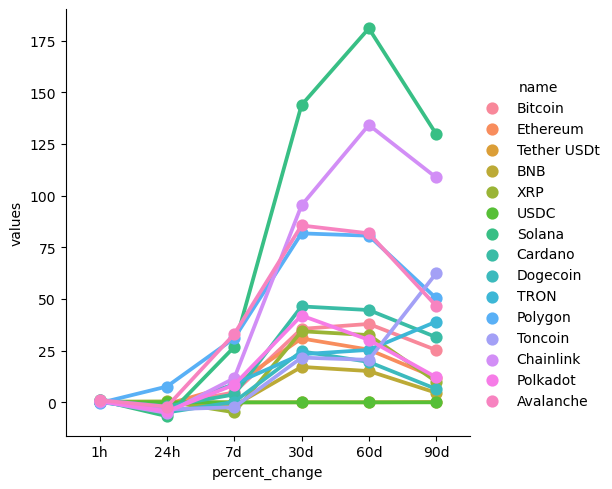

In [50]:
# using df9 as the final dataframe 
# creating a catplot

sns.catplot(x='percent_change', y='values', hue='name', data=df9, kind='point')

In [51]:
# The purpose of this project was to showcase the automation of the process of pulling data from an API and normalizing the data
# We further performed a few high-level cleaning and exploration of the data, with one simple visualization at the end 

# END